1. Initial Setup
Board1_Responses, Board2_Responses, Board3_Responses: These lists are initialized to store the responses from the three FPGA boards.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#Data File
Board1_Data_File_Path="CRPS/G6/Board1_10K_6.txt"
Board2_Data_File_Path="CRPS/G6/Board2_10K_6.txt"
Board3_Data_File_Name_Initial="CRPS/G6/Board3_G6/Board3_10K_6_S"
# Initialize lists to store responses for each board
G6_Board1_Responses = []
G6_Board2_Responses = []
G6_Board3_Responses = []

2. Function Definitions
2.1 Make_Challenge_Response_list(Board_Responses, file_name)
Purpose: This function reads response data from a file and appends the extracted response bits to a list.

Parameters:

Board_Responses: The list to store the response bits.
file_name: The path to the file containing Challenge-Response Pairs (CRPs).
How it Works:

The file is read line by line.
Every alternate line (assumed to be a response line) is processed.
The response part of the line (after the colon) is extracted and added to the list.

In [2]:
def G6_Challenge_Response_list(Board_Responses, file_name):
    """
    Reads the response file and extracts the response bits, adding them to the provided list.
    
    Parameters:
    Board_Responses (list): List to store the responses.
    file_name (str): Path to the file containing the CRPs.
    """
    with open(file_name, "r") as file:
        File_data = file.readlines()
        for idx, line in enumerate(File_data):
            if idx % 2 != 0:  # Only process response lines (assumes every other line is a response)
                sliced_string_responses = line.split(":")[1].strip()
                Board_Responses.append(sliced_string_responses)

2.2 calculate_uniformity(Board)
Purpose: This function calculates the uniformity of a PUF (Physical Unclonable Function) based on its response bits.

Parameters:

Board: A list of response bits from a specific board.
How it Works:

The function iterates over all the bits in the board's responses, counting the number of 1 bits.
Uniformity is calculated as the percentage of 1 bits out of the total number of bits.
The result is rounded to two decimal places.

In [3]:
def G6_Calculate_Uniformity(Board):
    """
    Calculates the uniformity of a PUF based on the response bits.

    Parameters:
    Board (list): List of response bits for a board.

    Returns:
    float: The uniformity percentage.
    """
   
    sum_responses = sum(int(bit) for row in Board for bit in row)
    count_responses = len(Board) * len(Board[0])
    uniformity = (sum_responses / count_responses) * 100
    return round(uniformity, 2)


2.3 calculate_uniqueness(Board_x, Board_y)
Purpose: This function calculates the uniqueness between the responses of two different FPGA boards.

Parameters:

Board_x: Response bits of Board X.
Board_y: Response bits of Board Y.
How it Works:

The function calculates the Hamming distance between the two sets of responses. The Hamming distance is the number of positions at which the corresponding bits are different.
Uniqueness is computed as the percentage of differing bits.
The result is rounded to two decimal places.

In [4]:
def G6_Calculate_Uniqueness(Board_x, Board_y):
    """
    Calculates the uniqueness between two boards based on their response bits.

    Parameters:
    Board_x (list): List of response bits for board X.
    Board_y (list): List of response bits for board Y.

    Returns:
    float: The uniqueness percentage.
    """
    hamming_distance = sum(x != y for x, y in zip(Board_x, Board_y))
    uniqueness = (hamming_distance / len(Board_x)) * 100
    return round(uniqueness, 2)

2.4 reliabilityOfPUF(base_filename)
Purpose: This function calculates the reliability of the PUF on a particular FPGA board by comparing multiple sets of response data.

Parameters:

base_filename: The base file name used to load the multiple sets of CRPs (e.g., Board3_10K_6_S).
How it Works:

The function loads 15 sets of responses, each from a separate file.
For each response position across the 15 sets, the function checks which bit (0 or 1) is the majority.
Reliability is calculated as the percentage of the majority bits that agree with each other across all 15 sets.
The result is averaged across all response positions and rounded to two decimal places.

In [5]:
def G6_Reliability_Of_PUF(base_filename):
    """
    Calculates the reliability of the PUF for a particular board by comparing multiple sets of responses.

    Parameters:
    base_filename (str): The base filename for the multiple sets of CRPs.

    Returns:
    float: The reliability percentage.
    """
    all_responses = []
    for i in range(1, 16):
        filename = f"{base_filename}{i}.txt"
        responses = []
        G6_Challenge_Response_list(responses, filename)
        all_responses.append(responses)
    
    reliability = 0
    for i in range(10000):  # Assumes 10K CRPs
        bits = [int(all_responses[j][i]) for j in range(15)]
        majority_vote = 1 if bits.count(1) > bits.count(0) else 0
        agreement_ratio = (bits.count(majority_vote) / 15) * 100
        reliability += agreement_ratio
    
    return round(reliability / 10000, 2)

3. Loading Response Data
The Make_Challenge_Response_list function is called to load the response data from the files for Board 1, Board 2, and Board 3.

In [6]:
# Load responses from files
G6_Challenge_Response_list(G6_Board1_Responses, Board1_Data_File_Path)
G6_Challenge_Response_list(G6_Board2_Responses, Board2_Data_File_Path)

# Load Board 3 responses from multiple files
for i in range(1, 16):
     G6_Challenge_Response_list(G6_Board3_Responses, f"{Board3_Data_File_Name_Initial}{i}.txt")

4. Calculating Metrics

4.1 Reliability Calculation
The reliabilityOfPUF function is used to calculate the reliability of Board 3 based on the 15 sets of response data.

In [7]:
# Reliability Calculation
board3_reliability = G6_Reliability_Of_PUF(Board3_Data_File_Name_Initial)

4.2 Uniformity Calculation
The calculate_uniformity function is called for each of the three boards to compute their respective uniformities.

In [8]:
# Uniformity Calculations
board1_uniformity = G6_Calculate_Uniformity(G6_Board1_Responses)
board2_uniformity = G6_Calculate_Uniformity(G6_Board2_Responses)
board3_uniformity = G6_Calculate_Uniformity(G6_Board3_Responses)

4.3 Uniqueness Calculation
The responses are first converted into integer arrays.
The calculate_uniqueness function is used to calculate the uniqueness between each pair of boards:
Board 1 and Board 2
Board 2 and Board 3
Board 1 and Board 3

In [9]:
# Convert responses to integer arrays for uniqueness calculation
Board1_array = [int(row) for row in G6_Board1_Responses]
Board2_array = [int(row) for row in G6_Board2_Responses]
Board3_array = [int(row) for row in G6_Board3_Responses]

In [10]:
# Uniqueness Calculations
uniqueness_Board1_Board2 = G6_Calculate_Uniqueness(Board1_array, Board2_array)
uniqueness_Board2_Board3 = G6_Calculate_Uniqueness(Board2_array, Board3_array)
uniqueness_Board1_Board3 = G6_Calculate_Uniqueness(Board1_array, Board3_array)

Displaying Results
The calculated metrics (reliability, uniformity, and uniqueness) are printed out, providing insights into the PUF's performance across different boards.

In [11]:
# Display results
results = {
    "Reliability for Board 3": f"{board3_reliability}%",
    "Uniformity for Board 1": f"{board1_uniformity}%",
    "Uniformity for Board 2": f"{board2_uniformity}%",
    "Uniformity for Board 3": f"{board3_uniformity}%",
    "Uniqueness between Board 1 and Board 2": f"{uniqueness_Board1_Board2}%",
    "Uniqueness between Board 2 and Board 3": f"{uniqueness_Board2_Board3}%",
    "Uniqueness between Board 1 and Board 3": f"{uniqueness_Board1_Board3}%"
}

# Display the calculated results
print("********************  Group 6 OutPut ********************")
for key, value in results.items():
    print(f"The {key} is: {value}")
print("")
print("********************  End  ********************")

********************  Group 6 OutPut ********************
The Reliability for Board 3 is: 99.75%
The Uniformity for Board 1 is: 25.51%
The Uniformity for Board 2 is: 27.54%
The Uniformity for Board 3 is: 21.45%
The Uniqueness between Board 1 and Board 2 is: 3.67%
The Uniqueness between Board 2 and Board 3 is: 6.93%
The Uniqueness between Board 1 and Board 3 is: 4.32%

********************  End  ********************


# Visualization Section

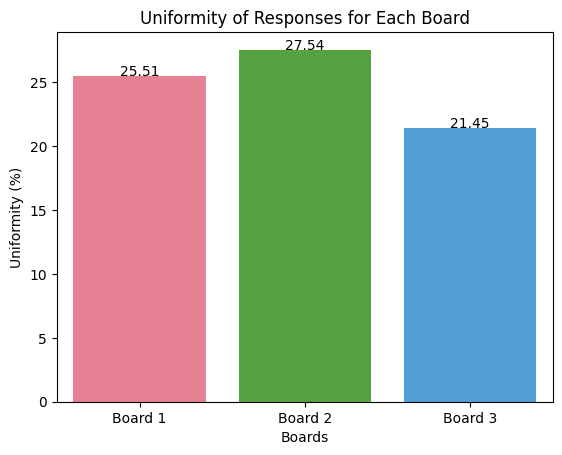

In [12]:

# 1. Uniformity Bar Chart with different colors

uniformity_data = pd.DataFrame({
    'Boards': ['Board 1', 'Board 2', 'Board 3'],
    'Uniformity (%)': [board1_uniformity, board2_uniformity, board3_uniformity]
})

# Create the barplot with updated parameters
ax = sns.barplot(x='Boards', y='Uniformity (%)', data=uniformity_data, hue='Boards', palette='husl', legend=False)

# Add value annotations on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 3), 
                textcoords='offset points')
# Add a title and show the plot
plt.title('Uniformity of Responses for Each Board')
plt.show()

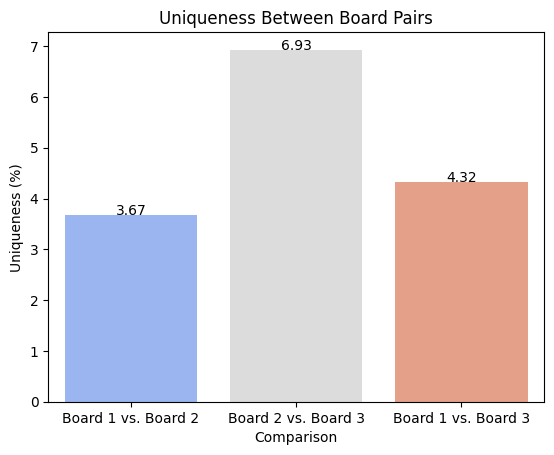

In [13]:
# 2. Uniqueness Bar Chart with different colors
uniqueness_data = pd.DataFrame({
    'Comparison': ['Board 1 vs. Board 2', 'Board 2 vs. Board 3', 'Board 1 vs. Board 3'],
    'Uniqueness (%)': [uniqueness_Board1_Board2, uniqueness_Board2_Board3, uniqueness_Board1_Board3]
})

ax =sns.barplot(x='Comparison', y='Uniqueness (%)', data=uniqueness_data, hue='Comparison', palette='coolwarm', legend=False)

# Add value annotations on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 3), 
                textcoords='offset points')
    
plt.title('Uniqueness Between Board Pairs')
plt.show()